In [1]:
from multi_modal_edge_ai.models.adl_inference.data_access.parser import parse_file
from multi_modal_edge_ai.models.adl_inference.ml_models.rnn_model import RNNModel
from multi_modal_edge_ai.commons.string_label_encoder import StringLabelEncoder
from multi_modal_edge_ai.models.adl_inference.validating.validate import split_and_validate

# Model parameters
window_length_seconds = 300
window_slide_seconds = 150
hidden_size = 128
num_hidden_layers = 1
activation = "tanh" # "tanh" or "relu"
fully_connected_activation = None # torch.nn.Tanh(), torch.nn.Softmax(dim=-1), torch.nn.LogSoftmax(dim=-1) or None

# File paths
(sdf, adf) = parse_file(r'../../public_datasets/Ordonez_Sensors.csv', r'../../public_datasets/Ordonez_ADLs.csv')

adls = adf['Activity'].unique().tolist()
adl_encoder = StringLabelEncoder(adls)

# If you want to replace the existing 'Activity' column with encoded values
adf['Activity'] = adf['Activity'].apply(adl_encoder.encode_label)
default_act = adl_encoder.encode_label('Idle')
sensors = sdf['Sensor'].unique().tolist()
sdf_encoder = StringLabelEncoder(sensors)

rnn = RNNModel(sensors, window_length_seconds, len(adls), hidden_size, num_hidden_layers, activation, fully_connected_activation)

In [5]:
result = split_and_validate(data=sdf, ground_truth=adf, model=rnn, labels=adls, label_encoder = adl_encoder, default_activity=default_act, window_length_seconds=window_length_seconds, window_slide_seconds=window_slide_seconds)



Training RNN model...
Epoch 1/10 | Loss: 8531.66084416397
Epoch 2/10 | Loss: 7616.95277342113
Epoch 3/10 | Loss: 7477.499799665296
Epoch 4/10 | Loss: 7467.987849870289
Epoch 5/10 | Loss: 7571.079306500615
Epoch 6/10 | Loss: 7441.127201205236
Epoch 7/10 | Loss: 7156.770557005657
Epoch 8/10 | Loss: 7127.6761215610895
Epoch 9/10 | Loss: 7248.514490488917
Epoch 10/10 | Loss: 7382.9640425459365


Finished training RNN model.


KeyboardInterrupt: 

In [ ]:
# Print accuracy
print('\n')
print('Accuracy =' + str(result[0]))



Accuracy =0.8333333333333334


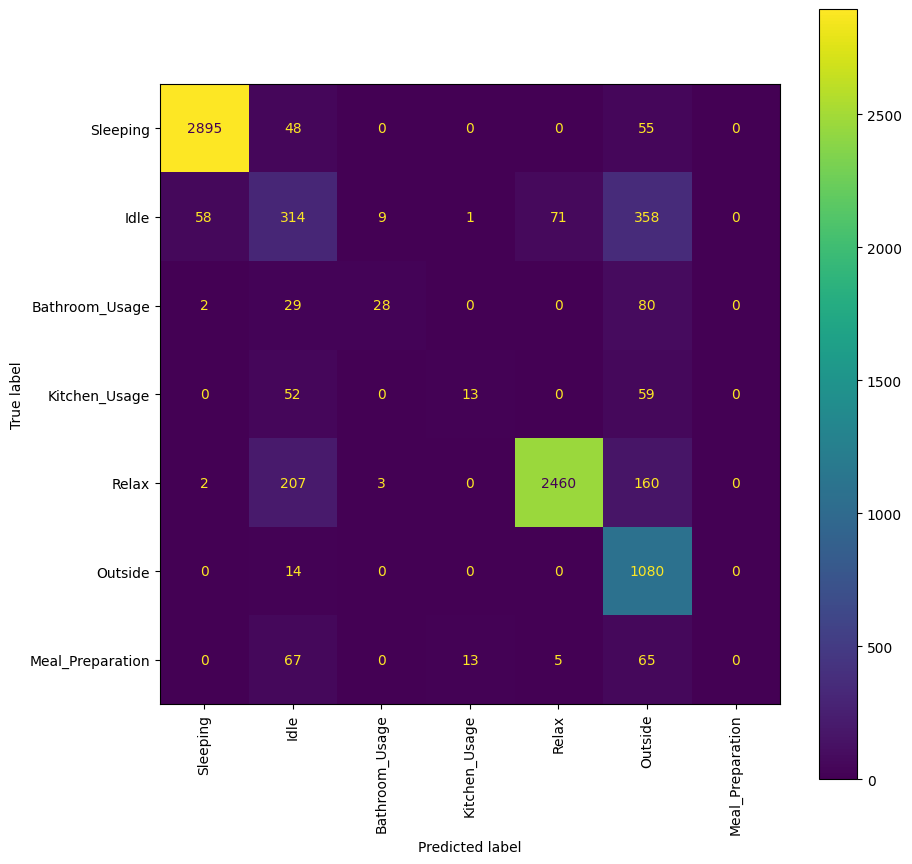

In [ ]:
# Plot confusion matrix
import matplotlib.pyplot as plt
from sklearn import metrics

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = result[1], display_labels = adls)
fig, ax = plt.subplots(figsize=(10,10))
cm_display.plot(ax=ax, xticks_rotation='vertical')
plt.show()